## DMDW Assignment-3

### Cluster analysis

### Algorithms used - KMeans, Hierarchial clustering(Agglomerative), Density based clustering (DBSCAN, OPTICS)

#### Harshal Deshpande --- BT18CSE079

### Necessary imports

In [1]:
# For dataframe
import pandas as pd

# For data preprocesing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS

# Evaluating cluster quality 
from sklearn.metrics import silhouette_score, davies_bouldin_score

# For pLotting results
import matplotlib.pyplot as plt
%matplotlib inline

### Data preprocessing

In [2]:
# Read and display dataset
data = pd.read_csv('gravity_location_data.csv')

data.head()

,initial_position,initial_velocity,mass,time,location
0,1759,2,615,38,-5240.466225
1,7010,21,805,62,-10523.592595
2,1114,85,710,40,-3326.077071
3,8768,14,718,69,-13594.914718
4,944,41,889,59,-13693.776505


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   initial_position  10000 non-null  int64  
 1   initial_velocity  10000 non-null  int64  
 2   mass              10000 non-null  int64  
 3   time              10000 non-null  int64  
 4   location          10000 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 390.8 KB


In [4]:
# Choose first 50 rows of data
data = data.iloc[:50,:]

# Scaling the data so that all the features become comparable 
X = data
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

print(X_scaled[:5, :])

[[-1.32566039 -1.73634764  0.3108194  -0.60009171  0.35373801]
 [ 0.42192266 -1.0432677   0.99338627  0.25616281 -0.03674005]
 [-1.54032256  1.29131736  0.65210283 -0.52873716  0.4952313 ]
 [ 1.00700188 -1.29861294  0.68084249  0.50590371 -0.26374274]
 [-1.59690019 -0.31370987  1.29515267  0.149131   -0.27104966]]


In [5]:
# Decrease dimensionality of data for efficient computations
# RD = Reduced dimension
pca = PCA(n_components=2) 
X_principal = pca.fit_transform(X_scaled) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['RD1', 'RD2']   
X = X_principal

X.head()

,RD1,RD2
0,0.259095,-2.171112
1,-0.370414,-1.041937
2,0.056390,0.169863
3,-0.435536,-0.873254
4,-1.049321,-1.244402


### For determining clustering algorithms parameters

In [6]:
# For Kmeans, try different number of clusters
# silhouette score must be max (close to 1) and davies_bouldin score must be min
for i in range(2,10):
    df1 = KMeans(n_clusters = i).fit_predict(X)
    print(silhouette_score(X, df1), davies_bouldin_score(X, df1))

0.3985815019647769 0.9627345284410406
0.3884069761745084 0.8529702173053719
0.40330400559446333 0.8364482269385082
0.41805574050232386 0.7236464144592626
0.41880547929909673 0.7125345558888689
0.39152641359562707 0.7883385725981674
0.41380319392234105 0.7274128431740068
0.42001288648225116 0.657498206194099


Best score is obtained for n = 5 OR 6. Therefore, num clusters = 5 OR 6

In [7]:
for i in range(2,10):
    df2 = AgglomerativeClustering(n_clusters = i).fit_predict(X)
    print(silhouette_score(X, df2), davies_bouldin_score(X, df2))

0.3688664883570496 1.0158109720660606
0.37272686599660126 0.8039672779552968
0.40021903361360694 0.8429746045873356
0.3939894299163013 0.7103249852508888
0.39772130125661753 0.683072131367445
0.38424340490171793 0.7311856194080933
0.37976692274372637 0.7518416320792176
0.39108112278548346 0.6975526380370312


num clusters = 6

In [8]:
import numpy as np

# Try different epsilon values (radius's)
rads = np.arange(0.5,1.2,0.1)

for i in rads:
    df3 = DBSCAN(eps = i).fit_predict(X)
    print(silhouette_score(X, df3), davies_bouldin_score(X, df3))

0.017476298029691105 2.8858703578498637
0.17094629959251736 2.1160432804601195
0.16431239689806684 5.083652380074855
0.26452995455556555 3.650035958383357
0.2306386023159941 2.3863007006779284
0.17125227990590314 0.6113847506750462
0.17125227990590314 0.6113847506750462


eps = 0.8

### Prediction and plotting results

### K-Means

In [9]:
KM = KMeans(n_clusters = 5).fit_predict(X)

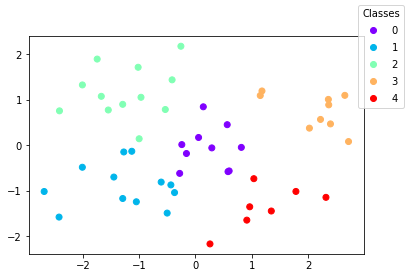

In [10]:
fig, ax = plt.subplots()
scatter = ax.scatter(X['RD1'], X['RD2'], c = KM, cmap ='rainbow')
legend = fig.legend(*scatter.legend_elements(), loc='upper right', title="Classes")

### Agglomerative Clustering

In [11]:
AC = AgglomerativeClustering(n_clusters = 6, linkage='complete').fit_predict(X)

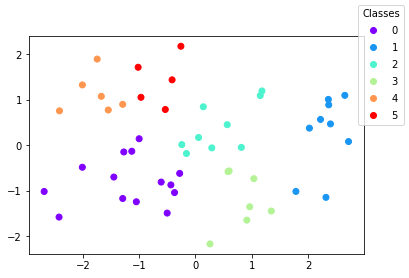

In [12]:
fig, ax = plt.subplots()
scatter = ax.scatter(X['RD1'], X['RD2'], c = AC, cmap ='rainbow')
legend = fig.legend(*scatter.legend_elements(), loc='upper right', title="Classes")

### DBSCAN

In [13]:
DB = DBSCAN(eps = 0.8).fit_predict(X)

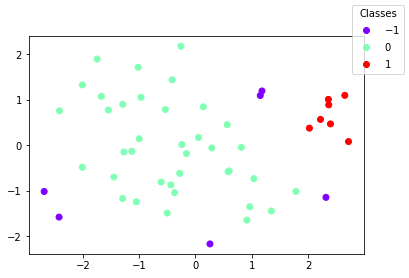

In [14]:
fig, ax = plt.subplots()
scatter = ax.scatter(X['RD1'], X['RD2'], c = DB, cmap ='rainbow')
legend = fig.legend(*scatter.legend_elements(), loc='upper right', title="Classes")

### OPTICS

In [15]:
OP = OPTICS(xi = 0.001).fit_predict(X)

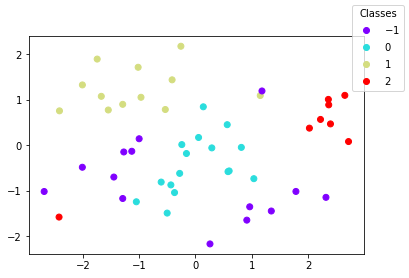

In [16]:
fig, ax = plt.subplots()
scatter = ax.scatter(X['RD1'], X['RD2'], c = OP, cmap ='rainbow')
legend = fig.legend(*scatter.legend_elements(), loc='upper right', title="Classes")

### Final scores

In [17]:
print(silhouette_score(X, KM), davies_bouldin_score(X, KM))

0.4148114627221647 0.7111060813422598


In [18]:
print(silhouette_score(X, AC), davies_bouldin_score(X, AC))

0.35540093488926094 0.7886343423658077


In [19]:
print(silhouette_score(X, DB), davies_bouldin_score(X, DB))

0.26452995455556555 3.650035958383357


In [20]:
print(silhouette_score(X, OP), davies_bouldin_score(X, OP))

0.22733437457894307 3.5649730608096326


### Best results achieved with KMeans algorithm